# Recurrent Neural Network

## Part 1 - Data Preprocessing

### 1) Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2) Importing the training set

In [29]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [30]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [31]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### 3) Feature Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1)) # data range between 0 and 1
training_set_scaled = sc.fit_transform(training_set)

In [33]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### 4) Creating a data structure with 60 timesteps and 1 output

In [34]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)    

### 5) Reshaping

In [35]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )

## Part 2 - Building and Training the RNN

### 1) Importing the Keras libraries and packages

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### 2) Initialising the RNN

In [37]:
regressor = Sequential()

### 3) Adding the first LSTM layer and some Dropout regularisation

In [38]:
regressor.add(LSTM(units=50, 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1],1)))

C:\Users\mjink\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
regressor.add(Dropout(0.2))

### 4) Adding a second LSTM layer and some Dropout regularisation

In [40]:
regressor.add(LSTM(units=50,
                   return_sequences=True))

In [41]:
regressor.add(Dropout(0.2))

### 5) Adding a third LSTM layer and some Dropout regularisation

In [42]:
regressor.add(LSTM(units=50,
                   return_sequences=True))

In [43]:
regressor.add(Dropout(0.2))

### 6) Adding a fourth LSTM layer and some Dropout regularisation

In [44]:
regressor.add(LSTM(units=50))

In [45]:
regressor.add(Dropout(0.2))

### 7) Adding the output layer

In [46]:
regressor.add(Dense(units=1))

### 8) Compiling the RNN

In [47]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### 9) Fitting the RNN to the Training set

In [48]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0939
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0066
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0048
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0055
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0040
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0049
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0044
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0052
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0052
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0047
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0055
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - lo

## Part 3 - Making the predictions and visualising the results

### 1) Getting the real stock price of 2017

In [49]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

### 2) Getting the predicted stock price of 2017

In [50]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [51]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [52]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
# for i in range(60, 80):
#     X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
# 예측값 얻기
predicted_stock_price = regressor.predict(X_test)

# predicted_stock_price의 형태 확인
print(predicted_stock_price.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
(20, 1)


In [54]:
# # 필요시 reshape
# predicted_stock_price = predicted_stock_price.reshape(-1, 1)

# 스케일 복원
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
# predicted_stock_price = regressor.predict(X_test)
# predicted_Stock_price = sc.inverse_transform(predicted_stock_price)

### 3) Visualising the results

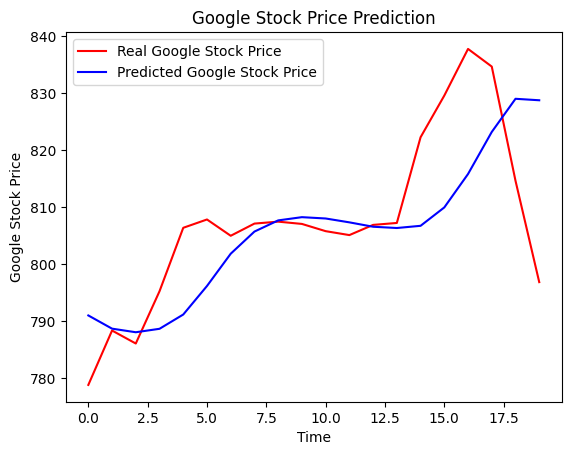

In [55]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()